In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

#Preparing Data

In [ ]:
path_economic = ('/content/sample_data/data_month.csv')
df  = pd.read_csv(path_economic)
df  = df .dropna()
df.head()

,year,month,GDP_grow_rate,agriculture,industry,service,GDP_real,GDP_per_capita,CPI,FDI_in,FDI_out,inflation_rate,exchange_rate,exchange,export,import,workers,unemployment_rate,income,income_VND
1,2000.0,1.0,1.03,3.76,8.61,2.08,33973,5627000,0.4,0.55,1.09,0.048,0.17,14052,853,949,37.6,2.3,228.34,3208697.494
2,2000.0,2.0,2.2,0.8,5.11,0.56,34496,5663000,1.6,0.21,1.03,0.053,0.04,14057,894,1112,37.68,2.32,228.36,3210111.719
3,2000.0,3.0,3.9,3.33,1.24,4.08,34498,5690000,-1.1,-0.4,1.39,0.054,0.03,14061,943,1181,37.75,2.33,228.55,3213654.015
4,2000.0,4.0,4.7,3.39,5.77,1.59,34675,5735000,-0.7,0.32,0.22,0.048,0.05,14068,1125,1187,37.8,2.35,228.59,3215793.204
5,2000.0,5.0,2.1,0.69,0.26,3.17,35294,5771000,-0.6,-0.7,0.16,0.047,0.11,14084,1160,1202,37.9,2.37,229.36,3230350.004


In [ ]:
df ['year'] = df ['year'].astype('int')
df ['month'] = df ['month'].astype('int')
df ['GDP_grow_rate'] = df ['GDP_grow_rate'].astype('float')
df ['GDP_real'] = df ['GDP_real'].astype('float')
df ['GDP_per_capita'] = df ['GDP_per_capita'].astype('float')
df ['agriculture'] = df ['agriculture'].astype('float')
df ['industry'] = df ['industry'].astype('float')
df ['service'] = df ['service'].astype('float')
df ['CPI'] = df ['CPI'].astype('float')
df ['FDI_in'] = df ['FDI_in'].astype('float')
df ['FDI_out'] = df ['FDI_out'].astype('float')
df ['inflation_rate'] = df ['inflation_rate'].astype('float')
df ['exchange_rate'] = df ['exchange_rate'].astype('float')
df ['exchange'] = df ['exchange'].astype('float')
df ['export'] = df ['export'].astype('float')
df ['import'] = df ['import'].astype('float')
df ['workers'] = df ['workers'].astype('float')
df ['unemployment_rate'] = df ['unemployment_rate'].astype('float')
df ['income'] = df['income'].astype('float')
df ['income_VND'] = df['income_VND'].astype('float')
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')
df = df.drop(['year', 'month'], axis=1)
df = df.set_index('date')

df.head()

,GDP_grow_rate,agriculture,industry,service,GDP_real,GDP_per_capita,CPI,FDI_in,FDI_out,inflation_rate,exchange_rate,exchange,export,import,workers,unemployment_rate,income,income_VND
date,,,,,,,,,,,,,,,,,,
2000-01-01,1.03,3.76,8.61,2.08,33973.0,5627000.0,0.4,0.55,1.09,0.048,0.17,14052.0,853.0,949.0,37.60,2.30,228.34,3208697.494
2000-02-01,2.20,0.80,5.11,0.56,34496.0,5663000.0,1.6,0.21,1.03,0.053,0.04,14057.0,894.0,1112.0,37.68,2.32,228.36,3210111.719
2000-03-01,3.90,3.33,1.24,4.08,34498.0,5690000.0,-1.1,-0.40,1.39,0.054,0.03,14061.0,943.0,1181.0,37.75,2.33,228.55,3213654.015
2000-04-01,4.70,3.39,5.77,1.59,34675.0,5735000.0,-0.7,0.32,0.22,0.048,0.05,14068.0,1125.0,1187.0,37.80,2.35,228.59,3215793.204
2000-05-01,2.10,0.69,0.26,3.17,35294.0,5771000.0,-0.6,-0.70,0.16,0.047,0.11,14084.0,1160.0,1202.0,37.90,2.37,229.36,3230350.004


#Splitdata and choose independence & dependence variable

In [ ]:
x = df[['GDP_per_capita', 'GDP_grow_rate','GDP_real', 'FDI_out','FDI_in','inflation_rate', 'CPI', 'import', 'export','exchange_rate', 'exchange', 'workers', 'income_VND']]
y = df['unemployment_rate']

**II. Cắt dữ liệu thành các tập train, test và validate**

In [ ]:
n_rows = len(df)
train_rows = int(n_rows * 0.6)
test_rows = int(n_rows * 0.2)
val_rows = int(n_rows - train_rows - test_rows)

# Chia tập dữ liệu thành 3 tập train, test và validate
X_train = x[:train_rows]
X_test = x[train_rows:train_rows+test_rows]
X_validate = x[train_rows+test_rows:]

Y_train = y[:train_rows]
Y_test = y[train_rows:train_rows+test_rows]
Y_validate = y[train_rows+test_rows:]

#Training model predict variable in future

In [ ]:
from xgboost import XGBRegressor

# Khởi tạo mô hình XGBoost hồi quy
model = XGBRegressor(objective='reg:squarederror', #đặt mục tiêu của mô hình là hồi quy và sử dụng square error loss để đánh giá sự khác biệt giữa gtri dự đoán và thực tế
    eval_metric='rmse', #tham số xác định độ đo để đánh giá hiệu suất của mô hình
    learning_rate=0.1, #tỷ lệ học của mô hình
    max_depth=3, #độ sâu tối đa của cây
    n_estimators=100 #số lượng cây
    )

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_validate)

**Đánh giá mô hình trên tập test tỉ lệ 7:2:1**

In [ ]:
# Đánh giá mô hình trên tập test

# 1. mse:tổng bình phương sai số trên tập mẫu (Giá trị MSE càng nhỏ, mô hình dự báo càng chính xác.)
mse = metrics.mean_squared_error(Y_test,y_pred)

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu,được sử dụng để đánh giá sai số trung bình giữa giá trị dự báo và giá trị thực tế
#(giá trị này càng nhỏ thì mô hình càng chính xác)
rmse = np.sqrt(mse)

# 3. mae : trị tuyệt đối trung bình(giá trị này càng nhỏ thì mô hình càng chính xác)
mae = metrics.mean_absolute_error(Y_test,y_pred)

#4. mape : tính toán độ sai lệch trung bình giữa các giá trị dự đoán và giá trị thực tế dưới dạng phần trăm(Giá trị MAPE càng nhỏ thì độ chính xác của mô hình càng cao)
#  mô hình có MAPE dưới 10% được xem là rất tốt
mape = metrics.mean_absolute_percentage_error(Y_test,y_pred)

# 5.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1,
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2 = r2_score(Y_test,y_pred)

print('MSE: ' , mse)
print('RMSE: ' , rmse)
print('MAE: ' , mae)
print('MAPE: ', mape * 100)
print('R2_squared: ' , r2)

MSE:  0.14732739755762211
RMSE:  0.3838325123769769
MAE:  0.2923904194748193
MAPE:  10.093481510787353
R2_squared:  -0.5051011436190662


**Đánh giá mô hình trên tập validate tỉ lệ 7:2:1**

In [ ]:
# Đánh giá mô hình trên tập validate

# 1. mse:tổng bình phương sai số trên tập mẫu (Giá trị MSE càng nhỏ, mô hình dự báo càng chính xác.)
mse = metrics.mean_squared_error(Y_validate,y_pred_val)

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu,được sử dụng để đánh giá sai số trung bình giữa giá trị dự báo và giá trị thực tế
#(giá trị này càng nhỏ thì mô hình càng chính xác)
rmse = np.sqrt(mse)

# 3. mae : trị tuyệt đối trung bình(giá trị này càng nhỏ thì mô hình càng chính xác)
mae = metrics.mean_absolute_error(Y_validate,y_pred_val)

#4. mape : tính toán độ sai lệch trung bình giữa các giá trị dự đoán và giá trị thực tế dưới dạng phần trăm(Giá trị MAPE càng nhỏ thì độ chính xác của mô hình càng cao)
#  mô hình có MAPE dưới 10% được xem là rất tốt
mape = metrics.mean_absolute_percentage_error(Y_validate,y_pred_val)

# 5.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1,
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2 = r2_score(Y_validate,y_pred_val)

print('MSE: ' , mse)
print('RMSE: ' , rmse)
print('MAE: ' , mae)
print('MAPE: ', mape * 100)
print('R2_squared: ' , r2)

MSE:  0.3877487577270671
RMSE:  0.6226947548575201
MAE:  0.5333963077946713
MAPE:  16.298529613458978
R2_squared:  -0.058263415458293055


In [ ]:
diff = np.abs(Y_test - y_pred)
new = pd.DataFrame({'Real' : Y_test,
                    'Predict' : y_pred,
                    'Differrence': diff})
new.head()
print(len(X_validate))

57


In [ ]:
x_future = X_validate[:57]  # Dữ liệu x của 60 tháng tiếp theo
y_future_pred = model.predict(x_future)

print("Dự đoán giá Close 30 ngày tiếp theo:")
for i in range(57):
  print(f"Tháng {i+1}: {y_future_pred[i]}")

Dự đoán giá Close 30 ngày tiếp theo:
Tháng 1: 3.322272300720215
Tháng 2: 3.1106019020080566
Tháng 3: 3.3148019313812256
Tháng 4: 3.322272300720215
Tháng 5: 3.322272300720215
Tháng 6: 3.3663392066955566
Tháng 7: 3.3717360496520996
Tháng 8: 3.322272300720215
Tháng 9: 3.320939302444458
Tháng 10: 3.2790820598602295
Tháng 11: 3.2844789028167725
Tháng 12: 2.9823660850524902
Tháng 13: 2.9871909618377686
Tháng 14: 3.3533878326416016
Tháng 15: 3.3148019313812256
Tháng 16: 3.313218593597412
Tháng 17: 3.355684995651245
Tháng 18: 3.3717050552368164
Tháng 19: 3.322272300720215
Tháng 20: 3.3541016578674316
Tháng 21: 3.358927011489868
Tháng 22: 3.320939302444458
Tháng 23: 3.322272300720215
Tháng 24: 3.322016716003418
Tháng 25: 3.322272300720215
Tháng 26: 3.2805542945861816
Tháng 27: 3.1783621311187744
Tháng 28: 3.322272300720215
Tháng 29: 3.3717360496520996
Tháng 30: 3.3543519973754883
Tháng 31: 3.3611254692077637
Tháng 32: 3.3206889629364014
Tháng 33: 3.319906234741211
Tháng 34: 3.3479530811309814
T

#Plot result

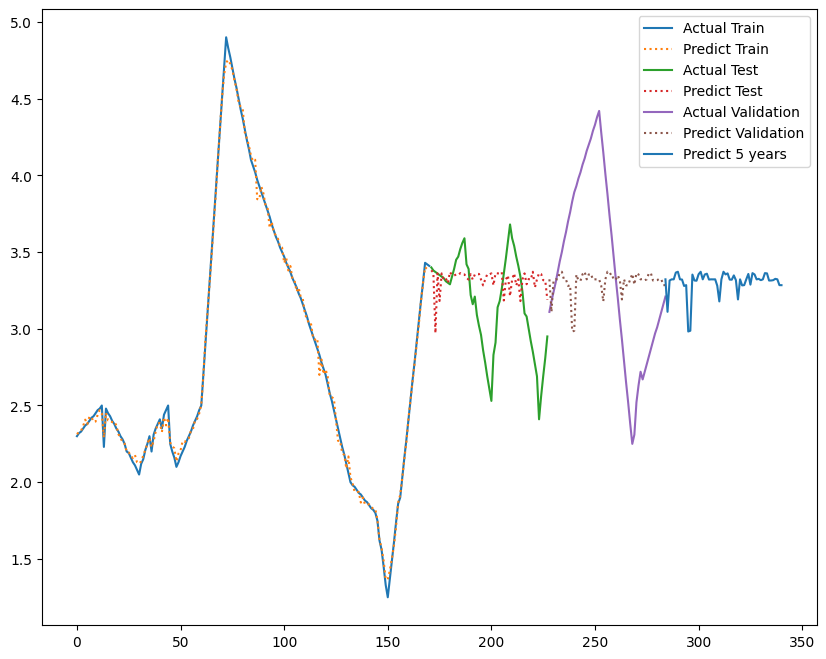

In [ ]:
plt.figure(figsize=(10,8))

color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

train_data_index = pd.RangeIndex(start=0, stop=train_rows, step=1)
plt.plot(train_data_index, Y_train, label="Actual Train", color = color_palette[0])
plt.plot(train_data_index, y_pred_train, label="Predict Train", linestyle="dotted", color = color_palette[1])

test_data_index = pd.Range'Index(start=train_rows, stop=train_rows+test_rows)
plt.plot(test_data_index,Y_test, label="Actual Test", color=color_palette[2])
plt.plot(test_data_index,y_pred,label="Predict Test", linestyle="dotted", color=color_palette[3])

val_data_index = pd.RangeIndex(start=train_rows+test_rows, stop=train_rows+test_rows+val_rows)
plt.plot(val_data_index,Y_validate,label="Actual Validation", color=color_palette[4])
plt.plot(val_data_index,y_pred_val, label="Predict Validation", linestyle="dotted",color=color_palette[5])

prediect_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+56, step=1)
plt.plot(prediect_data_index, y_future_pred, label="Predict 5 years")

plt.legend()
plt.show()'